# How much agency do we have over our relationships? 
i.e. Do structural or internal factors have a greater effect on divorce?


## Importing libraries

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Uploading Dataset

In [296]:
divorce = pd.read_csv('divorce_df.csv')

In [297]:
# divorce column names
divorce.columns

Index(['age_at_marriage', 'marriage_duration_years', 'num_children',
       'education_level', 'employment_status', 'combined_income',
       'religious_compatibility', 'cultural_background_match',
       'communication_score', 'conflict_frequency',
       'conflict_resolution_style', 'financial_stress_level',
       'mental_health_issues', 'infidelity_occurred', 'counseling_attended',
       'social_support', 'shared_hobbies_count', 'marriage_type',
       'pre_marital_cohabitation', 'domestic_violence_history', 'trust_score',
       'divorced'],
      dtype='object')

## Creating dataframes for structural factors and internal factors

Structural Factors

In [299]:
# make new df with structural factors
structural_factors = divorce[['age_at_marriage', 
                              'num_children', 
                              'education_level', 
                              'employment_status', 
                              'marriage_type', 
                              'combined_income', 
                              'religious_compatibility', 
                              'cultural_background_match', 
                              'mental_health_issues', 
                              'social_support', 
                              'divorced']].copy()

structural_factors.head()

,age_at_marriage,num_children,education_level,employment_status,marriage_type,combined_income,religious_compatibility,cultural_background_match,mental_health_issues,social_support,divorced
0,30,1,Bachelor,Full-time,Love,64001,Different Religion,1,0,8.428183,1
1,27,2,Master,Full-time,Love,86221,Same Religion,1,0,5.297221,1
2,31,0,High School,Part-time,Arranged,69441,Same Religion,0,0,5.887066,1
3,35,2,Bachelor,Full-time,Love,69513,Not Religious,1,0,5.263555,0
4,26,2,No Formal Education,Full-time,Love,63986,Different Religion,1,0,5.771259,1


## Dealing with categorical variables

### Structural Factors

In [265]:
religious_mapping = {'Not Religious': 0, 'Same Religion': 0, 'Different Religion': 1}
structural_factors['religious_compatibility'] = structural_factors['religious_compatibility'].map(religious_mapping)

In [266]:
# One-hot encoding for employment_status, cultural_background_match, marriage type
structural_factors = pd.get_dummies(
    structural_factors,
    columns=['employment_status', 'marriage_type', 'education_level'],
)
structural_factors.head(10)

,age_at_marriage,num_children,combined_income,religious_compatibility,cultural_background_match,mental_health_issues,social_support,divorced,employment_status_Full-time,employment_status_Homemaker,employment_status_Part-time,employment_status_Unemployed,marriage_type_Arranged,marriage_type_Love,marriage_type_Other,education_level_Bachelor,education_level_High School,education_level_Master,education_level_No Formal Education,education_level_PhD
0,30,1,64001,1,1,0,8.428183,1,True,False,False,False,False,True,False,True,False,False,False,False
1,27,2,86221,0,1,0,5.297221,1,True,False,False,False,False,True,False,False,False,True,False,False
2,31,0,69441,0,0,0,5.887066,1,False,False,True,False,True,False,False,False,True,False,False,False
3,35,2,69513,0,1,0,5.263555,0,True,False,False,False,False,True,False,True,False,False,False,False
4,26,2,63986,1,1,0,5.771259,1,True,False,False,False,False,True,False,False,False,False,True,False
5,26,0,44605,0,0,0,6.909350,0,True,False,False,False,False,True,False,False,True,False,False,False
6,35,2,73454,1,1,0,7.351375,0,True,False,False,False,False,True,False,False,True,False,False,False
7,31,1,59491,0,1,0,8.709813,1,False,False,False,True,False,True,False,False,True,False,False,False
8,25,1,40944,0,0,0,8.727489,0,True,False,False,False,True,False,False,True,False,False,False,False
9,30,0,46819,0,1,1,5.939285,1,True,False,False,False,True,False,False,False,False,False,False,True


### Internal Factors

In [ ]:
internal_factors = divorce[['communication_score', 
                            'conflict_frequency', 
                            'conflict_resolution_style', 
                            'infidelity_occurred', 
                            'counseling_attended',
                            'pre_marital_cohabitation',
                            'domestic_violence_history', 
                            'trust_score', 
                            'divorced']].copy()
internal_factors.head(10)

,communication_score,conflict_frequency,conflict_resolution_style,infidelity_occurred,counseling_attended,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,5.536016,3,Collaborative,0,0,1,0,6.262411,1
1,5.810172,3,Aggressive,1,0,1,0,6.769384,1
2,6.088146,3,Collaborative,0,0,1,0,5.532866,1
3,6.212046,3,Aggressive,0,0,1,0,3.491264,0
4,4.826262,1,Passive,0,1,1,0,10.000000,1
5,6.825964,3,Collaborative,0,0,1,0,4.628149,0
6,3.775491,1,Passive,0,0,1,0,5.753932,0
7,6.613021,4,Aggressive,0,0,0,0,7.010559,1
8,2.963345,0,Collaborative,0,0,1,0,2.428385,0
9,3.612109,1,Collaborative,0,0,1,0,8.750676,1


In [268]:
# one-hot encoding conflict_resolution_style
internal_factors = pd.get_dummies(
    internal_factors,
    columns=['conflict_resolution_style'],
)
internal_factors.head()

,communication_score,conflict_frequency,infidelity_occurred,counseling_attended,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced,conflict_resolution_style_Aggressive,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive
0,5.536016,3,0,0,1,0,6.262411,1,False,False,True,False
1,5.810172,3,1,0,1,0,6.769384,1,True,False,False,False
2,6.088146,3,0,0,1,0,5.532866,1,False,False,True,False
3,6.212046,3,0,0,1,0,3.491264,0,True,False,False,False
4,4.826262,1,0,1,1,0,10.000000,1,False,False,False,True


In [273]:
# z-score scaling (on training dataset) - continuous and ordinal columns
# mean = 0, sd = 1

In [274]:
# do we need to split the data into train and test first?

Scaling variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling structural factors
structural_factors_scaled = structural_factors.copy()
columns_to_scale = ['age_at_marriage', 'num_children', 'social_support', 'combined_income']
structural_factors_scaled[columns_to_scale] = scaler.fit_transform(structural_factors_scaled[columns_to_scale])

structural_factors_scaled.head()

,age_at_marriage,num_children,combined_income,religious_compatibility,cultural_background_match,mental_health_issues,social_support,divorced,employment_status_Full-time,employment_status_Homemaker,employment_status_Part-time,employment_status_Unemployed,marriage_type_Arranged,marriage_type_Love,marriage_type_Other,education_level_Bachelor,education_level_High School,education_level_Master,education_level_No Formal Education,education_level_PhD
0,0.497663,-0.443161,0.192314,1,1,0,1.252390,1,True,False,False,False,False,True,False,True,False,False,False,False
1,-0.120194,0.358505,1.322521,0,1,0,-0.340726,1,True,False,False,False,False,True,False,False,False,True,False,False
2,0.703615,-1.244827,0.469017,0,0,0,-0.040598,1,False,False,True,False,True,False,False,False,True,False,False,False
3,1.527425,0.358505,0.472679,0,1,0,-0.357857,0,True,False,False,False,False,True,False,True,False,False,False,False
4,-0.326146,0.358505,0.191551,1,1,0,-0.099523,1,True,False,False,False,False,True,False,False,False,False,True,False


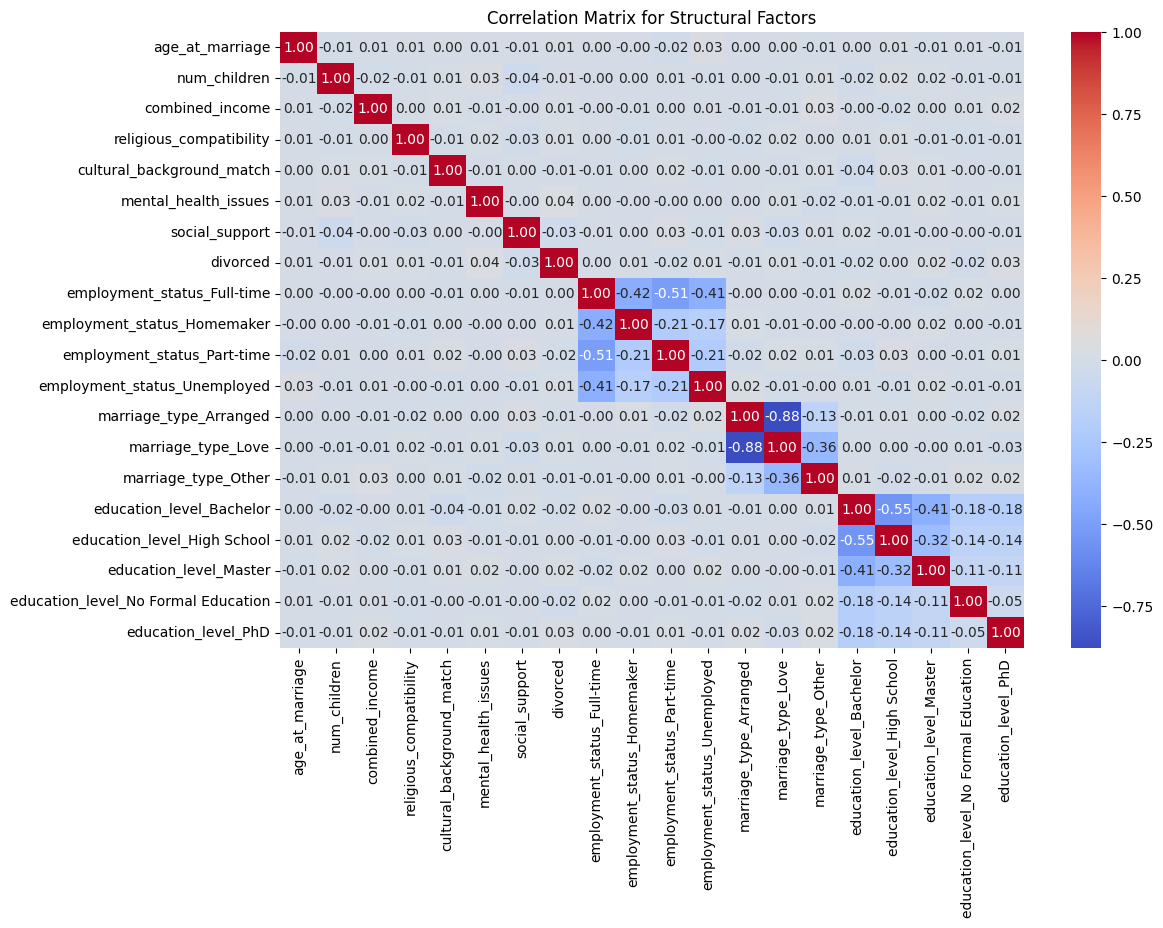

In [ ]:
# correlation matrix for structural factors
corr_matrix_structural = structural_factors_scaled.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_structural, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Structural Factors Scaled')
plt.show()

In [ ]:
# scaling internal factors
internal_factors_scaled = internal_factors.copy()
columns_to_scale = ['communication_score', 'conflict_frequency', 'trust_score']
internal_factors_scaled[columns_to_scale] = scaler.fit_transform(internal_factors_scaled[columns_to_scale])

internal_factors_scaled.head()

,communication_score,conflict_frequency,infidelity_occurred,counseling_attended,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced,conflict_resolution_style_Aggressive,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive
0,-0.256980,0.702445,0,0,1,0,0.119978,1,False,False,True,False
1,-0.117329,0.702445,1,0,1,0,0.382288,1,True,False,False,False
2,0.024267,0.702445,0,0,1,0,-0.257490,1,False,False,True,False
3,0.087379,0.702445,0,0,1,0,-1.313822,0,True,False,False,False
4,-0.618518,-0.713775,0,1,1,0,2.053819,1,False,False,False,True


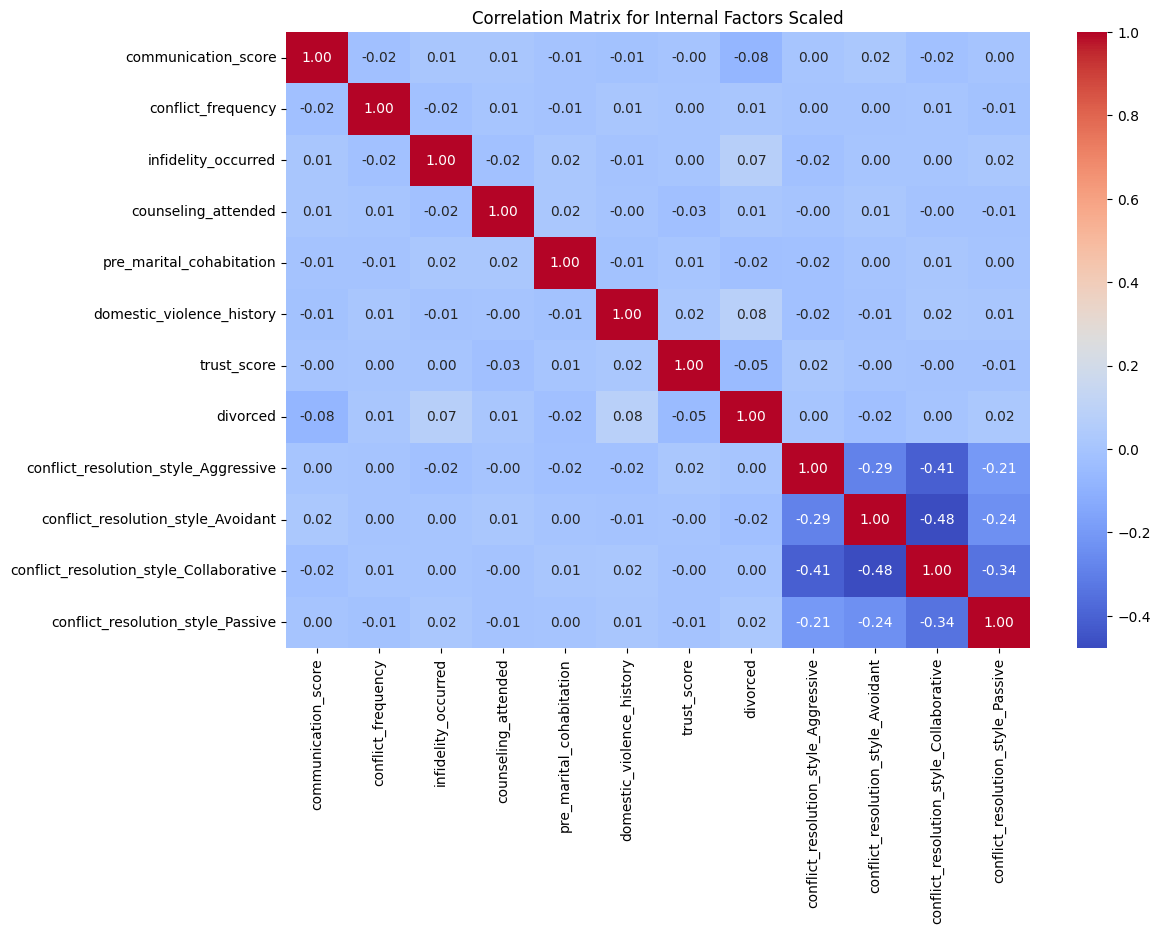

In [282]:
# correlation matrix for internal factors
corr_matrix_internal = internal_factors_scaled.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_internal, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Internal Factors Scaled')
plt.show()

## Building models

In [252]:
import statsmodels.formula.api as smf

## Internal Factors

In [ ]:
# logistic regression model 
m_logit = smf.logit("divorced ~ infidelity_occurred + domestic_violence_history + communication_score + trust_score", data=internal_factors).fit()
print(m_logit.summary())

Optimization terminated successfully.
         Current function value: 0.662110
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                 0.01512
Time:                        14:30:14   Log-Likelihood:                -3310.5
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                 4.373e-21
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5219      0.033    -16.015      0.000      -0.

next steps: compute odds‑ratios table, ROC/AUC, confusion matrix, check multicollinearity, consider adding predictors/interactions, and assess calibration.


## Interpretation:
infidelity has significant positive effect on divorce outcome i.e. presence of infidelity increases log‑odds of divorce.

domestic_violence_history has significant positive effect of divorce i.e. presence of a domestic violence history increases log odds of divorce.

trust_score has significant negative effect i.e. high trust score decreases log odds of divorce.

communication_score has significant negative effect i.e. better communication decreases log odds of divorce.

## Structural Factors

In [255]:
m_logit = smf.logit("divorced ~ mental_health_issues + social_support + education_level_PhD", data=structural_factors).fit()
print(m_logit.summary())

Optimization terminated successfully.
         Current function value: 0.670700
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                0.002343
Time:                        14:30:19   Log-Likelihood:                -3353.5
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                  0.001275
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4632      0.033    -13.982      0.000   

### Interpretation:

education_level_PhD (p = 0.082) = positive coefficient but not significant at α=0.05.

mental_health_issues = significant positive association: higher mental‑health issues increases log‑odds of divorce.

social_support = significant negative association: more social support decreases log‑odds of divorce.

### to improve model fit:

add interactions, 
remove highly collinear variables, 
multi class logistic model, 
etc.

In [294]:
# add interaction term for internal factors model
# formula interactions
model = smf.logit("divorced ~ infidelity_occurred * counseling_attended + trust_score + communication_score", data=internal_factors_scaled).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.665253
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4994
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                 0.01045
Time:                        16:16:39   Log-Likelihood:                -3326.3
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                 9.217e-14
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.3180